In [134]:
from batch_ingest import Batch
import pandas as pd

PATH = "C:\\Users\\Brown Planning\\Documents\\Innova\\Datasets\\"
FILE = "personnel-frp-deviations.csv"
fpath = PATH + FILE

chunks = Batch(fpath, yname='Deviation', chunksz=320, wtype='h5', train_perc=0.6)
chunks.raw.ds


0.71 seconds to read file in 1 batches


,cols,distinct,levels,dtype,mtype,constant,names,func
0,UIC,"[N21943, N21942, N21833, N55687, N55686, N2299...",80,cat,x,False,"[UIC_N20010, UIC_N20121, UIC_N21313, UIC_N2148...",<function ctgz at 0x0000024159E8FDC0>
1,Apprentice,"[3.0, 8.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0,...",1,num,x,False,[Apprentice],<function stdz at 0x0000024159E8F670>
2,Journeyman,"[16.0, 25.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32....",1,num,x,False,[Journeyman],<function stdz at 0x0000024159E8F670>
3,Master,"[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,...",1,num,x,False,[Master],<function stdz at 0x0000024159E8F670>
4,Junior Officer,"[5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 1...",1,num,x,False,[Junior Officer],<function stdz at 0x0000024159E8F670>
...,...,...,...,...,...,...,...,...
260,6180,"[0.0, 1.0, nan]",1,num,x,False,[6180],<function stdz at 0x0000024159E8F670>
261,7120,"[0.0, 1.0, nan]",1,num,x,False,[7120],<function stdz at 0x0000024159E8F670>
262,7130,"[0.0, 1.0, 2.0, nan]",1,num,x,False,[7130],<function stdz at 0x0000024159E8F670>
263,FRP Phase,"[S, I, D, B]",4,cat,x,False,"[FRP Phase_B, FRP Phase_D, FRP Phase_I, FRP Ph...",<function ctgz at 0x0000024159E8FDC0>


In [135]:
# Export LaTex DataStructure to txt file
ds = chunks.raw.ds
ds = ds.drop(['func', 'constant', 'names'], axis = 1)

txt = ds.to_latex(index = False, multirow = True)
with open("RawDSTbl.txt", "w") as text_file:
    text_file.write(txt)


In [136]:
chunks.write(intercept=False)
chunks.matrix.ds

batchfile0 deleted
0 rows dropped for NaN values
batch0 320 rows 3.94 seconds
Data processing took 3.94 seconds



,cols,distinct,levels,dtype,mtype,constant,names,func
0,Apprentice,"[0.30000001192092896, 0.3799999952316284, 0.47...",1,num,x,False,[Apprentice],<function stdz at 0x0000024159E8F670>
1,Journeyman,"[0.37931033968925476, 0.5747126340866089, 0.35...",1,num,x,False,[Journeyman],<function stdz at 0x0000024159E8F670>
2,Master,"[0.3913043439388275, 0.43478259444236755, 0.34...",1,num,x,False,[Master],<function stdz at 0x0000024159E8F670>
3,Junior Officer,"[0.29729729890823364, 0.8918918967247009, 0.67...",1,num,x,False,[Junior Officer],<function stdz at 0x0000024159E8F670>
4,Mid-Grade Officer,"[0.0, 0.5, 1.0]",1,num,x,False,[Mid-Grade Officer],<function stdz at 0x0000024159E8F670>
...,...,...,...,...,...,...,...,...
331,UIC_N55688,"[0, 1]",1,num,x,False,[UIC_N55688],<function stdz at 0x0000024159E8F670>
332,UIC_nan,"[0, 1]",1,num,x,False,[UIC_nan],<function stdz at 0x0000024159E8F670>
333,FRP Phase_D,"[0, 1]",1,num,x,False,[FRP Phase_D],<function stdz at 0x0000024159E8F670>
334,FRP Phase_I,"[0, 1]",1,num,x,False,[FRP Phase_I],<function stdz at 0x0000024159E8F670>


In [137]:
from itertools import combinations
from scipy.stats.stats import pearsonr

df = chunks.load(subpop=None)
corr_list = []
for combo in list(combinations(df.columns.tolist(), 2))[:20]:
    x, y = combo
    rho, p = pearsonr(df[x], df[y])
    corr_list.append([x, y, rho, p])
    
scorr_list = [row for row in corr_list if row[3] <= 0.05]  # significant correlations
redun = [[x, sum([1 for row in scorr_list if x in row])] for x in df.columns]
redundf = pd.DataFrame(redun, columns=['Feature', 'Redundancy'])
redundf

,Feature,Redundancy
0,Apprentice,16
1,Journeyman,1
2,Master,1
3,Junior Officer,1
4,Mid-Grade Officer,1
...,...,...
331,UIC_N55688,0
332,UIC_nan,0
333,FRP Phase_D,0
334,FRP Phase_I,0


In [138]:
traindf = chunks.load(subpop='train')
traindf 

cols,Apprentice,Journeyman,Master,Junior Officer,Mid-Grade Officer,Warrant,GSEC,LS3,FC1,YN2,...,UIC_N50407,UIC_N55684,UIC_N55685,UIC_N55686,UIC_N55687,UIC_N55688,UIC_nan,FRP Phase_D,FRP Phase_I,FRP Phase_S
1,0.38,0.574713,0.434783,0.891892,0.0,0.666667,0.0,0.0,0.666667,0.5,...,0,0,0,0,0,0,0,0,0,0
2,0.38,0.367816,0.391304,0.837838,0.5,0.666667,0.0,0.5,0.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
3,0.46,0.471264,0.260870,0.540541,0.0,0.000000,0.0,0.5,0.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
6,0.48,0.367816,0.347826,0.270270,0.0,0.333333,0.0,0.5,0.333333,0.0,...,0,0,0,0,0,0,0,0,0,0
7,0.46,0.528736,0.304348,0.891892,0.0,0.666667,1.0,0.5,0.333333,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,0.98,0.977012,1.000000,0.756757,0.5,0.666667,1.0,0.5,0.666667,1.0,...,0,0,0,0,0,0,0,0,0,1
312,0.50,0.482759,0.478261,0.378378,0.0,0.000000,0.0,0.5,0.000000,1.0,...,0,0,0,0,0,0,0,0,0,1
315,0.34,0.413793,0.304348,0.972973,0.0,0.666667,0.0,0.0,0.000000,0.5,...,0,0,0,0,0,0,0,0,0,1
318,0.98,0.977012,1.000000,0.756757,0.5,0.666667,1.0,0.5,0.666667,1.0,...,0,0,0,0,0,0,0,0,0,1


In [139]:
X = traindf.drop(['Deviation'], axis = 1)
y = traindf['Deviation']
X

cols,Apprentice,Journeyman,Master,Junior Officer,Mid-Grade Officer,Warrant,GSEC,LS3,FC1,YN2,...,UIC_N50407,UIC_N55684,UIC_N55685,UIC_N55686,UIC_N55687,UIC_N55688,UIC_nan,FRP Phase_D,FRP Phase_I,FRP Phase_S
1,0.38,0.574713,0.434783,0.891892,0.0,0.666667,0.0,0.0,0.666667,0.5,...,0,0,0,0,0,0,0,0,0,0
2,0.38,0.367816,0.391304,0.837838,0.5,0.666667,0.0,0.5,0.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
3,0.46,0.471264,0.260870,0.540541,0.0,0.000000,0.0,0.5,0.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
6,0.48,0.367816,0.347826,0.270270,0.0,0.333333,0.0,0.5,0.333333,0.0,...,0,0,0,0,0,0,0,0,0,0
7,0.46,0.528736,0.304348,0.891892,0.0,0.666667,1.0,0.5,0.333333,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,0.98,0.977012,1.000000,0.756757,0.5,0.666667,1.0,0.5,0.666667,1.0,...,0,0,0,0,0,0,0,0,0,1
312,0.50,0.482759,0.478261,0.378378,0.0,0.000000,0.0,0.5,0.000000,1.0,...,0,0,0,0,0,0,0,0,0,1
315,0.34,0.413793,0.304348,0.972973,0.0,0.666667,0.0,0.0,0.000000,0.5,...,0,0,0,0,0,0,0,0,0,1
318,0.98,0.977012,1.000000,0.756757,0.5,0.666667,1.0,0.5,0.666667,1.0,...,0,0,0,0,0,0,0,0,0,1


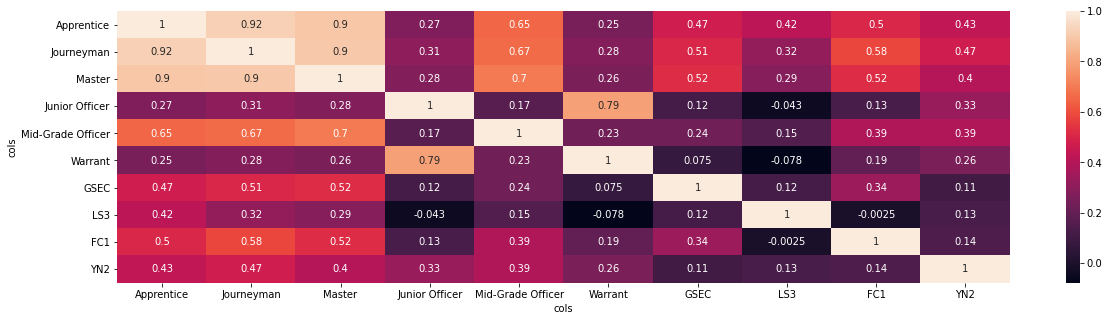

In [140]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = traindf.corr()

# Export Correlation Matrix
corrMatrix.to_csv('CorrelationMatrix.csv', index=False)

corrMatrix = traindf.iloc[:, : 10].corr()  # subset of data
fig = plt.figure(figsize=(20, 5))
sn.heatmap(corrMatrix, annot=True)
plt.savefig('CorrelationMatrix.png')
plt.show()

In [149]:
import statsmodels.api as sm

model = sm.OLS(y.values.tolist(), X.values.tolist()).fit()
model.summary(xname=list(X.columns))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     1.786
Date:                Mon, 11 Jan 2021   Prob (F-statistic):            0.00237
Time:                        04:27:07   Log-Likelihood:                -826.02
No. Observations:                 192   AIC:                             1814.
Df Residuals:                     111   BIC:                             2078.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Apprentice            1.2642      0.942      1.342      0.182      -0.603       3.131
Journeyman            1.1317      0.509      2.222      0.028       0.122       2.141
Master               -0.5109      0.699     -0.731      0.466      -1.895       0.873
Junior Officer        0.3810      1.663      0.229      0.819      -2.915       3.677
Mid-Grade Officer     0.7239      1.677      0.432      0.667      -2.600       4.048
Warrant              -0.7599      2.008     -0.378      0.706      -4.739       3.219
GSEC                  0.2564      3.624      0.071      0.944      -6.924       7.437
LS3                   1.7481      3.239      0.540      0.590      -4.670       8.166
FC1                  -3.9954      2.518     -1.587      0.115      -8.985       0.994
YN2                  -0.8105      1.837     -0.441      0.660      -4.451       2.830
STG1                 -2.0031      2.440     -0.821      0.414      -6.839       2.833
BM2                  -3.7391      2.618     -1.428      0.156      -8.928       1.450
CTTC                  3.2268      2.900      1.113      0.268      -2.520       8.973
QM1                   4.9044      2.471      1.985      0.050       0.008       9.801
FCCS                  4.8020      1.302      3.688      0.000       2.222       7.382
PS3                  -3.9955      2.475     -1.614      0.109      -8.901       0.910
GSM2                 -0.0828      2.216     -0.037      0.970      -4.473       4.308
EN1                   0.8640      1.244      0.695      0.489      -1.601       3.329
BM3                   6.5885      2.359      2.793      0.006       1.913      11.263
CTR1                  7.1590      3.244      2.207      0.029       0.730      13.588
ET1                  -0.2787      3.023     -0.092      0.927      -6.268       5.711
HT3                   9.0738      3.063      2.962      0.004       3.004      15.144
LS2                   4.4517      2.296      1.939      0.055      -0.098       9.001
EMC                  -2.6084      1.506     -1.732      0.086      -5.593       0.376
LSC                  -1.9470      2.048     -0.951      0.344      -6.005       2.111
FCC                  -3.9489      1.996     -1.979      0.050      -7.903       0.006
MR2                   1.7173      2.266      0.758      0.450      -2.774       6.208
MA1                   2.4138      3.411      0.708      0.481      -4.346       9.174
DC1                  -1.6908      2.453     -0.689      0.492      -6.551       3.170
MM1                  -8.1356      3.677     -2.213      0.029     -15.421      -0.850
OS2                   4.1685      1.618      2.577      0.011       0.963       7.374
CTM3                 -5.2474      2.909     -1.804      0.074     -11.012       0.517
OSC                  -1.1260      1.343     -0.839      0.404      -3.787

In [148]:
# Export Regression Summary Table
df = model.summary2(xname=list(X.columns)).tables[0]
df.to_csv('OLSRegSumm.csv', index=False)

# Export Coefficients Table
df = model.summary2(xname=list(X.columns)).tables[1]
df.to_csv('CoefTbl.csv', index=False)
df

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.248
1,Dependent Variable:,y,AIC:,1814.0449
2,Date:,2021-01-11 04:26,BIC:,2077.9021
3,No. Observations:,192,Log-Likelihood:,-826.02
4,Df Model:,80,F-statistic:,1.786
5,Df Residuals:,111,Prob (F-statistic):,0.00237
6,R-squared:,0.563,Scale:,552.52


<ipython-input-54-bfc700a49d4d>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = (45), fontsize =20)


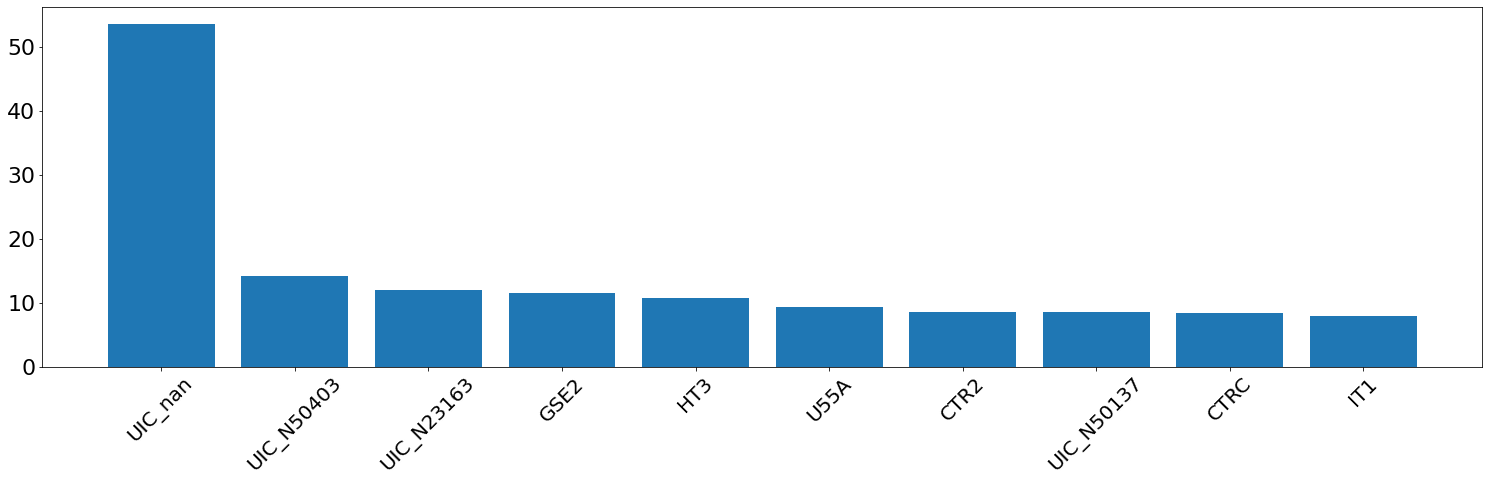

In [54]:
effects = df.sort_values(by=['Coef.'], ascending = False)
effects.to_csv('Coefficients.csv', index=False)

plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(20, 5))
ax = fig.add_axes([0, 0, 1, 1])
x_labels = list(effects.index)[:10]
values = list(effects['Coef.'])[:10]
ax.bar(x_labels, values)
ax.set_xticklabels(x_labels, rotation = (45), fontsize =20)
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error

testdf = chunks.load(subpop='test')
testdf 
Xtest = testdf.drop(['Deviation'], axis = 1)
ytest = testdf['Deviation']
yhat = model.predict(Xtest)
mean_squared_error(yhat, ytest)

989.7674104405238

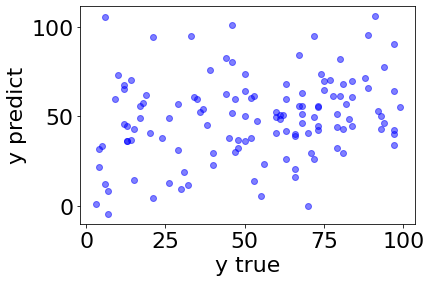

In [56]:
plt.scatter(ytest, yhat, c='blue', alpha=0.5)
plt.xlabel('y true')
plt.ylabel('y predict')
plt.show()